<a href="https://colab.research.google.com/github/atrahay/news_nao/blob/main/News_nao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
import math
import pandas as pd

df = pd.DataFrame(columns=['source', 'author', 'title', 'description', 'url', 'urlToImage', 'publishedAt', 'content'])
df
API_KEY = "258275c0180041fb82b5f9d574799473"
url = f"https://newsapi.org/v2/everything?q=karate&sortBy=publishedAt&apiKey={API_KEY}"

response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    nb_pages = math.ceil(data["totalResults"] / 100) # pagination
else:
    print('Error:', response.status_code)
for counter in range(1, nb_pages + 1):
  url = f"https://newsapi.org/v2/everything?q=karate&sortBy=publishedAt&page={counter}&apiKey={API_KEY}"
  response = requests.get(url)
  if response.status_code == 200:
      data = response.json()
  else:
      print('Error:', response.status_code)
  for count in range(100):
    if count < len(data["articles"]):
      my_dict = data["articles"][count]
      my_list = [my_dict['source']['name'], my_dict['author'], my_dict['title'], my_dict['description'], my_dict['url'], my_dict['urlToImage'], my_dict['publishedAt'], my_dict['content']]
      df.loc[count + (counter - 1) * 100]= my_list
df.to_csv("output.csv")



In [4]:
"""

from datetime import date, timedelta
today = date.today() # today
day = timedelta(days=1) # 1 day duration

for counter in range(30):
  temp_date = today - counter*day
  date = f"{temp_date.year}-{temp_date.month}-{temp_date.day}"
  nwe_date = f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}"
  print(f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}")

nwe_date

"""

'\n\nfrom datetime import date, timedelta\ntoday = date.today() # today\nday = timedelta(days=1) # 1 day duration\n\nfor counter in range(30):\n  temp_date = today - counter*day\n  date = f"{temp_date.year}-{temp_date.month}-{temp_date.day}"\n  nwe_date = f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}"\n  print(f"https://newsapi.org/v2/everything?q=karate&from={date}&sortBy=publishedAt&apiKey={API_KEY}")\n\nnwe_date\n\n'

In [5]:
df['url']

0      https://www.comunidadxbox.com/lars-protagoniza...
1      https://www.bloodyelbow.com/2023/3/22/23651423...
2      https://www.marca.com/otros-deportes/2023/03/2...
3      https://www.sorrisi.com/tv/da-the-night-agent-...
4      https://www.whats-on-netflix.com/leaving-soon/...
                             ...                        
434    https://www.nieuwsblad.be/cnt/dmf20230222_9409...
435          https://www.gva.be/cnt/dmf20230222_94096341
436    https://www.rferl.org/a/germany-expels-iran-di...
437    https://www.rferl.org/a/rferl-chief-jamie-fly-...
438    https://www.bloodyelbow.com/2023/2/22/23609864...
Name: url, Length: 439, dtype: object

In [6]:
# clean content

for _ , row in df.iterrows():
  row['content'] = " ".join(row['content'].split(" ")[:-3])

df['content'][10]

'Prosegue la serie di reveal trailer dedicata ai personaggi e agli stili di combattimento presenti in Tekken 8, e oggi è la volta di un personaggio presente solo dai tempi di Tekken 6, ma da allora'

In [7]:
df.columns

Index(['source', 'author', 'title', 'description', 'url', 'urlToImage',
       'publishedAt', 'content'],
      dtype='object')

In [8]:
# merge columns with text

df['merge_text'] = df[["content", "title", "description"]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

df

,source,author,title,description,url,urlToImage,publishedAt,content,merge_text
0,Comunidadxbox.com,Adrian Moreno,Lars protagoniza el electrizante nuevo tráiler...,Alta tensión en el nuevo tráiler con gameplay ...,https://www.comunidadxbox.com/lars-protagoniza...,https://www.comunidadxbox.com/wp-content/uploa...,2023-03-22T12:30:00Z,Parece que la gente de Bandai Namco se ha prop...,Parece que la gente de Bandai Namco se ha prop...
1,Bloody Elbow,June M. Williams,"Fat Fingers, Fat Scales, MMA Chicanery + More ...","A compelling MMA VIDEO Podcast, with a smatter...",https://www.bloodyelbow.com/2023/3/22/23651423...,https://cdn.vox-cdn.com/thumbor/uz1PPs0JjuBGpt...,2023-03-22T12:00:00Z,June M. Williams\r\n\n \n\n A compelling MMA V...,June M. Williams\r\n\n \n\n A compelling MMA V...
2,Marca,ANDRÉS GARCÍA,Damián Quintero sigue en racha: peleará por el...,Se mete en la final donde se medirá al italian...,https://www.marca.com/otros-deportes/2023/03/2...,https://phantom-marca.unidadeditorial.es/3b1a5...,2023-03-22T11:37:05Z,Damián Quintero seguirá con su racha de podios...,Damián Quintero seguirá con su racha de podios...
3,Sorrisi.com,Stefano Gradi,"Da “The night agent” a “Christian”, i nuovi fi...","Cosa vedere dal 22 al 28 marzo su Netflix, Pri...",https://www.sorrisi.com/tv/da-the-night-agent-...,https://www.sorrisi.com/wp-content/uploads/202...,2023-03-22T10:50:45Z,"Cosa vedere dal 22 al 28 marzo su Netflix, Pri...","Cosa vedere dal 22 al 28 marzo su Netflix, Pri..."
4,What's on Netflix,Jacob Robinson,143 Movies and TV Shows Leaving Netflix Canada...,143 Movies and TV shows are scheduled to leave...,https://www.whats-on-netflix.com/leaving-soon/...,https://www.whats-on-netflix.com/wp-content/up...,2023-03-22T10:24:36Z,Illustration by What’s on Netflix\r\nIt’s goin...,Illustration by What’s on Netflix\r\nIt’s goin...
...,...,...,...,...,...,...,...,...,...
434,Nieuwsblad.be,Erik Vandewalle,Shihan Marc Briels staat aan het hoofd van de ...,Marc Briels is al meer dan een halve eeuw acti...,https://www.nieuwsblad.be/cnt/dmf20230222_9409...,https://static.nieuwsblad.be/Assets/Images_Upl...,2023-02-22T11:12:00Z,"Het is een hele eer om gevraagd te worden, wan...","Het is een hele eer om gevraagd te worden, wan..."
435,Www.gva.be,Erik Vandewalle,Shihan Marc Briels staat aan het hoofd van de ...,Marc Briels is al meer dan een halve eeuw acti...,https://www.gva.be/cnt/dmf20230222_94096341,https://static.gva.be/Assets/Images_Upload/202...,2023-02-22T11:12:00Z,"Het is een hele eer om gevraagd te worden, wan...","Het is een hele eer om gevraagd te worden, wan..."
436,Radio Free Europe/ Radio Liberty,RFE/RL,Germany Expels Two Iranian Diplomats Over Deat...,Germany on February 22 said it was expelling t...,https://www.rferl.org/a/germany-expels-iran-di...,https://gdb.rferl.org/c4170000-0aff-0242-56cd-...,2023-02-22T10:51:34Z,"In late September, Pedram Azarnush was taking ...","In late September, Pedram Azarnush was taking ..."
437,Radio Free Europe/ Radio Liberty,RFE/RL's Radio Farda,RFE/RL Chief Jamie Fly Among New Additions To ...,Radio Free Europe/Radio Liberty President and ...,https://www.rferl.org/a/rferl-chief-jamie-fly-...,https://gdb.rferl.org/58071b9c-023e-4a57-a909-...,2023-02-22T10:21:08Z,"In late September, Pedram Azarnush was taking ...","In late September, Pedram Azarnush was taking ..."


In [9]:
df["merge_text"][0]

'Parece que la gente de Bandai Namco se ha propuesto darnos una dosis semanal de Tekken 8 y nos ha desvelado a un nuevo luchador de su plantel. Esta vez le ha llegado el turno a Lars que, al igual,Lars protagoniza el electrizante nuevo tráiler de Tekken 8,Alta tensión en el nuevo tráiler con gameplay de Tekken 8 que tiene como protagonistas a Lars Alexandersson y sus ataques relámpago. Parece que la gente de Bandai Namco se ha propuesto darnos una dosis semanal de Tekken 8 y nos ha desvelado a un nuevo luchado…'

In [10]:
!pip install deep-translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from deep_translator import GoogleTranslator
from tqdm import tqdm

GoogleTranslator(source='auto', target='english').translate(df["merge_text"][11])


for index , row in tqdm(df.iterrows()):
  row["merge_text"] = GoogleTranslator(source='auto', target='english').translate(df["merge_text"][index])

df["merge_text"]

439it [00:58,  7.51it/s]


0      It seems that the people of Bandai Namco have ...
1      June M. Williams\r\n\n \n\n A compelling MMA V...
2      Damián Quintero will continue his streak of po...
3      What to see from March 22 to 28 on Netflix, Pr...
4      Illustration by What’s on Netflix\r\nIt’s goin...
                             ...                        
434    It is a great honor to be asked, because it me...
435    It is a great honor to be asked, because it me...
436    In late September, Pedram Azarnush was taking ...
437    In late September, Pedram Azarnush was taking ...
438    June M. Williams\r\n\n \n\n A compelling MMA V...
Name: merge_text, Length: 439, dtype: object

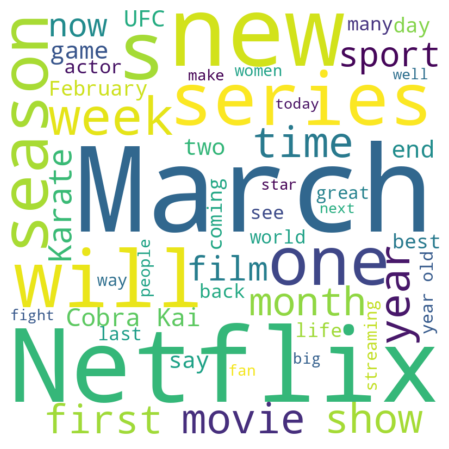

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = " ".join(df["merge_text"])

wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, stopwords=STOPWORDS, min_font_size=10).generate(text)
                                                                                                  
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


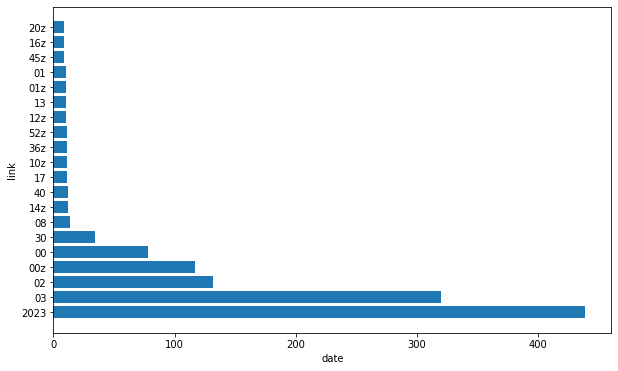

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

publishedAt = (df['publishedAt'])

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the preprocessed text data
vectorizer.fit_transform(publishedAt)

# Get the list of unique words in the text data
words = vectorizer.get_feature_names_out()

# Calculate the frequency of each word in the text data
word_freq = vectorizer.transform(publishedAt).toarray().sum(axis=0)

fig, ax = plt.subplots(figsize=(10,6))
ax.barh(words[np.argsort(word_freq)[-20:]], np.sort(word_freq)[-20:])
ax.set_xlabel('date')
ax.set_ylabel('link')
ax.invert_yaxis()
plt.show()
     

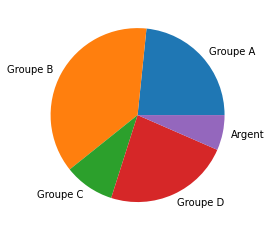

In [47]:
import matplotlib.pyplot as plt

data = [25, 40, 10, 25, 7]
labels = ['Groupe A', 'Groupe B', 'Groupe C', 'Groupe D', 'Argent']
plt.pie(data, labels=labels)
plt.show()

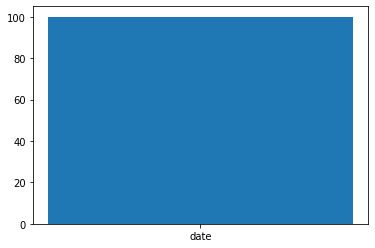

In [43]:
import matplotlib.pyplot as plt
names = ['date']   # nom des barres
values = [1, 10, 100]
plt.bar(names, values) ; plt.show() # Tracer

In [27]:
# formater la colonne ‘publishedAt’
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['publishedAt'] = df['publishedAt'].dt.strftime('%d/%m/%Y')
df['publishedAt']

0      22/03/2023
1      22/03/2023
2      22/03/2023
3      22/03/2023
4      22/03/2023
          ...    
434    22/02/2023
435    22/02/2023
436    22/02/2023
437    22/02/2023
438    22/02/2023
Name: publishedAt, Length: 439, dtype: object

In [28]:
# import de pandas
import pandas as pd

# chargement de votre dataframe
df = pd.read_csv('output.csv')

# spécification de la colonne dans laquelle rechercher le mot
colonne = 'content'

# spécification du mot à rechercher
mot = 'Netflix'

# utilisation de la méthode str.contains() pour créer un masque de booléens
masque = df[colonne].str.contains(mot)

# comptage des articles correspondants
nombre_articles = masque.sum()

# affichage du résultat
print(f"Il y a {nombre_articles} articles dans le dataframe contenant le mot '{mot}' dans la colonne '{colonne}'.")
nombre_articles

Il y a 60 articles dans le dataframe contenant le mot 'Netflix' dans la colonne 'content'.


60

In [61]:
import pandas as pd

# Filtrer les articles contenant le mot "Netflix"
articles_contenant_mot = df[df['content'].str.contains('Netflix')]

# Convertir la colonne "publishedAt" en objet datetime et extraire la date
df['date'] = pd.to_datetime(df['publishedAt']).dt.date

# Regrouper les articles par date et compter le nombre d'articles par date
articles_par_date = articles_contenant_mot.groupby(df['date']).size().reset_index(name='nb_articles')

# Afficher les résultats
articles_par_date




,date,nb_articles
0,2023-02-22,9
1,2023-02-23,3
2,2023-02-24,1
3,2023-02-26,2
4,2023-02-27,6
5,2023-02-28,10
6,2023-03-01,8
7,2023-03-02,4
8,2023-03-03,4
9,2023-03-05,3


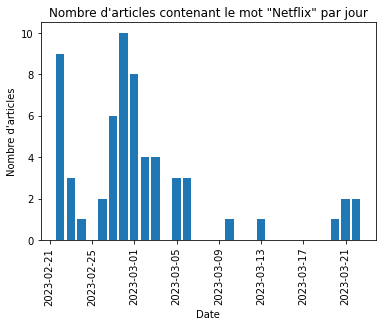

In [48]:
import matplotlib.pyplot as plt

# Tracer un graphique en barres du nombre d'articles par jour
plt.bar(articles_par_date['date'], articles_par_date['nb_articles'])

# Ajouter un titre et des étiquettes d'axe
plt.title('Nombre d\'articles contenant le mot "Netflix" par jour')
plt.xlabel('Date')
plt.ylabel('Nombre d\'articles')

# Faire pivoter les étiquettes de l'axe x pour les rendre lisibles
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()


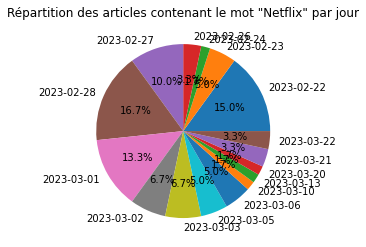

In [66]:
import matplotlib.pyplot as plt

# Tracer un graphique circulaire
plt.pie(articles_par_date['nb_articles'], labels=articles_par_date['date'], autopct='%1.1f%%')

# Ajouter un titre
plt.title('Répartition des articles contenant le mot "Netflix" par jour')
plt.xticks(rotation=90)

# Afficher le graphique
plt.show()


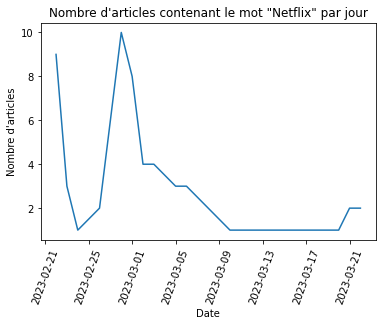

In [68]:
import matplotlib.pyplot as plt

# Tracer un graphique linéaire
plt.plot(articles_par_date['date'], articles_par_date['nb_articles'])

# Ajouter des étiquettes
plt.xlabel('Date')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles contenant le mot "Netflix" par jour')
plt.xticks(rotation=70)

# Afficher le graphique
plt.show()


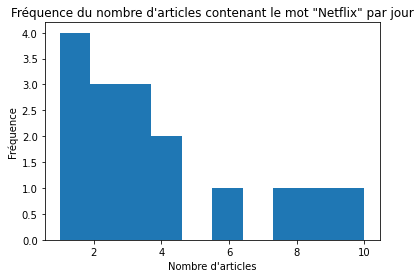

In [67]:
import matplotlib.pyplot as plt

# Tracer un histogramme
plt.hist(articles_par_date['nb_articles'])

# Ajouter des étiquettes
plt.xlabel('Nombre d\'articles')
plt.ylabel('Fréquence')
plt.title('Fréquence du nombre d\'articles contenant le mot "Netflix" par jour')

# Afficher le graphique
plt.show()


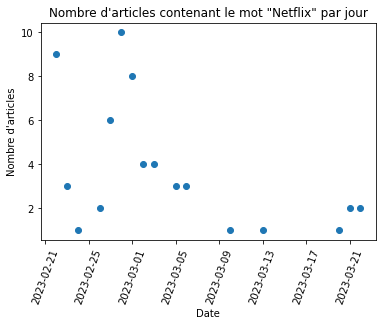

In [70]:
import matplotlib.pyplot as plt

# Tracer un nuage de points
plt.scatter(articles_par_date['date'], articles_par_date['nb_articles'])

# Ajouter des étiquettes
plt.xlabel('Date')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles contenant le mot "Netflix" par jour')
plt.xticks(rotation=70)

# Afficher le graphique
plt.show()


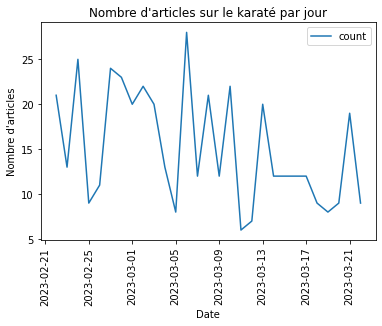

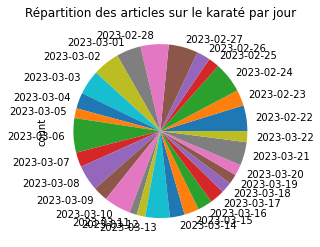

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('output.csv')
df['publishedAt'] = pd.to_datetime(df['publishedAt']).dt.date
articles_per_day = df.groupby('publishedAt').size().reset_index(name='count')
articles_per_day.plot(x='publishedAt', y='count')
plt.xlabel('Date')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles sur le karaté par jour')
plt.xticks(rotation=90)
articles_per_day = df.groupby('publishedAt').size().reset_index(name='count')
articles_per_day.plot(kind='pie', y='count', labels=articles_per_day['publishedAt'], legend=False)
plt.title('Répartition des articles sur le karaté par jour')


plt.show()



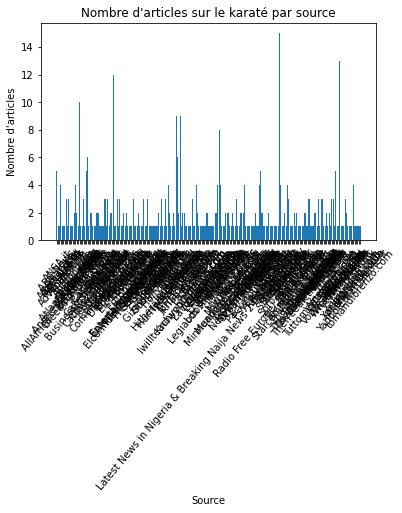

In [82]:
import matplotlib.pyplot as plt

# Count number of articles per source
source_counts = df.groupby('source').size().reset_index(name='count')

# Create bar chart
plt.bar(source_counts['source'], source_counts['count'])
plt.title('Nombre d\'articles sur le karaté par source')
plt.xlabel('Source')
plt.ylabel('Nombre d\'articles')
plt.xticks(rotation=50)

# Display chart
plt.show()


In [83]:
# Search for articles about karate movies
df_films = df[df['title'].str.contains('film|cinéma|acteur', case=False)]

# Display results
df_films


,Unnamed: 0,source,author,title,description,url,urlToImage,publishedAt,content
3,3,Sorrisi.com,Stefano Gradi,"Da “The night agent” a “Christian”, i nuovi fi...","Cosa vedere dal 22 al 28 marzo su Netflix, Pri...",https://www.sorrisi.com/tv/da-the-night-agent-...,https://www.sorrisi.com/wp-content/uploads/202...,2023-03-22,"Cosa vedere dal 22 al 28 marzo su Netflix, Pri..."
160,160,Yahoo Entertainment,Local Journalism Initiative,Tiny is a short film about a strong woman,"​Ritchie Hemphill, ’Nakwaxda’xw, is a West Coa...",https://ca.news.yahoo.com/tiny-short-film-stro...,https://s.yimg.com/cv/apiv2/social/images/yaho...,2023-03-09,"Ritchie Hemphill, Nakwaxdaxw, is a West Coast ..."
214,214,Nowymarketing.pl,Nowy Marketing,Jake Gyllenhaal promuje remake filmu „Road Hou...,Gwiazdą gali UFC 285 był aktor Jake Gyllenhaal...,"https://nowymarketing.pl/a/41305,jake-gyllenha...",https://nowymarketing.pl/i/articles/41305_orig...,2023-03-06,Jake Gyllenhaal zaskakuje fanów MMA\r\nNa widz...
265,265,Www.nu.nl,Superguide,Nieuw op Netflix: Deze films en series versche...,Elke week breidt Netflix het aanbod uit met ni...,https://www.nu.nl/film/6253751/nieuw-op-netfli...,https://media.nu.nl/m/fwuxmh6a9vaq_wd1280/nieu...,2023-03-03,Elke week breidt Netflix het aanbod uit met ni...
267,267,Slickdeals.net,Discombobulated,The Karate Kid (1984) (4K UHD Digital Film; MA...,"Amazon \n \nFor those interested \n \nNote, be...",https://slickdeals.net/f/16487029-the-karate-k...,https://static.slickdealscdn.com/attachment/8/...,2023-03-03,"Amazon\r\nFor those interested\r\nNote, be sur..."
289,289,Interia.pl,Radosław Nawrot,Broad Peak to historia na wstrząsający film. C...,"Kiedy w zeszłym roku wszedł na ekrany film ""Br...",https://sport.interia.pl/gory/news-broad-peak-...,https://i.iplsc.com/-/000GTHOWYE6NRU2Q-C429.jpg,2023-03-02,"Film ""Broad Peak"" stanowi pewien przeom. Na te..."
329,329,Leganerd.com,Davide Mirabello,Netflix marzo 2023: tutti i film e le serie TV...,"Ecco tutte le novità di marzo 203 su Netflix, ...",https://leganerd.com/2023/02/28/netflix-marzo-...,https://leganerd.com/wp-content/uploads/2023/0...,2023-02-28,"Ecco tutte le novità di marzo 203 su Netflix, ..."
355,355,Everyeye.it,Mattia Manneschi,"Sky e NOW, da Elvis a Bones and All: ecco i fi...","Il biopic di Elvis, le inquietanti atmosfere d...",https://cinema.everyeye.it/articoli/rubrica-sk...,https://images.everyeye.it/img-articoli/sky-no...,2023-02-27,"Elvis di Baz Luhrmann, il riuscitissimo biopic..."
379,379,Cineblog.it,Pietro Ferraro,Beyond Redemption: trailer e anticipazioni del...,"Tutto quello che c'è da sapere su ""Beyond Rede...",https://www.cineblog.it/post/beyond-redemption...,https://www.blogo.it/app/uploads/sites/3/2023/...,2023-02-25,"E uscito negli Stati Uniti, direttamente in Bl..."


In [86]:
df_grouped = df.groupby('publishedAt').size().reset_index(name='count')
df_grouped


,publishedAt,count
0,2023-02-22,21
1,2023-02-23,13
2,2023-02-24,25
3,2023-02-25,9
4,2023-02-26,11
5,2023-02-27,24
6,2023-02-28,23
7,2023-03-01,20
8,2023-03-02,22
9,2023-03-03,20


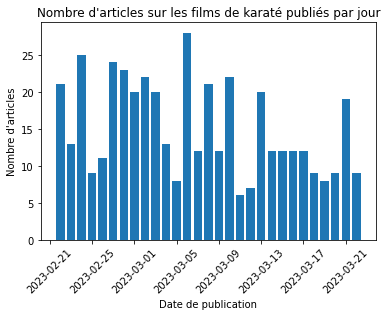

In [85]:
import matplotlib.pyplot as plt

plt.bar(df_grouped['publishedAt'], df_grouped['count'])
plt.xlabel('Date de publication')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles sur les films de karaté publiés par jour')
plt.xticks(rotation=45)
plt.show()


In [88]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df_grouped = df.resample('W', on='publishedAt').size().reset_index(name='count')
df_grouped


,publishedAt,count
0,2023-02-26,79
1,2023-03-05,130
2,2023-03-12,108
3,2023-03-19,85
4,2023-03-26,37


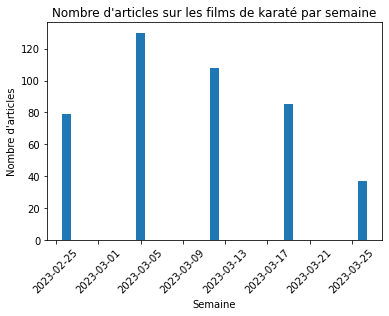

In [90]:
import matplotlib.pyplot as plt

plt.bar(df_grouped['publishedAt'], df_grouped['count'])
plt.xlabel('Semaine')
plt.ylabel('Nombre d\'articles')
plt.title('Nombre d\'articles sur les films de karaté par semaine')
plt.xticks(rotation=45)
plt.show()

